In [1]:
import pandas as pd
import numpy as np

np.random.seed(2)
student_ids = np.random.randint(1, 11, size=25)

course_ids = np.random.choice([101, 102, 103, 104, 105], size=25)

nov = pd.DataFrame({
    'studentid': student_ids,
    'courseid': course_ids
})


np.random.seed(52)
student_ids = np.random.randint(1, 11, size=25)

course_ids = np.random.choice([1, 2, 3, 4, 5], size=25)

dec = pd.DataFrame({
    'studentid': student_ids,
    'courseid': course_ids
})




In [2]:
# Vertically stack but it give eror in index , repeat index
# Same thing we can do using append but in future version it is going to decryppt

reg = pd.concat([nov,dec] , ignore_index=True)


<h1>Multi Index DataFrame</h1>

In [3]:

reg = pd.concat([nov,dec] , keys=["Nov","Dec"])
reg.loc["Nov",5]


studentid      8
courseid     105
Name: (Nov, 5), dtype: int32

In [4]:

ver = pd.concat([nov,dec] , axis=1)


In [5]:
ver

,studentid,courseid,studentid,courseid
0,9,104,6,3
1,9,102,8,4
2,7,103,7,5
3,3,101,8,3
4,9,105,1,1
5,8,105,6,4
6,3,103,4,2
7,2,105,4,3
8,6,103,2,3
9,5,102,4,2


In [6]:
# Inner join that is common in both the table

In [7]:
np.random.seed(42)

student_ids = np.random.randint(1, 11, size=25)  # Student IDs from 1 to 10
course_ids = np.random.choice([101, 102, 103, 104, 105, 106], size=25)  # Course IDs (some overlap)

students_courses = pd.DataFrame({
    'studentid': student_ids,
    'courseid': course_ids
})

courses_info = pd.DataFrame({
    'courseid': [103, 104, 105, 106, 107, 108],
    'coursename': ['Math', 'Science', 'History', 'Art', 'Music', 'Physics']
})

# print("DataFrame 1: students_courses\n", students_courses)
# print("\nDataFrame 2: courses_info\n", courses_info)

inner = pd.merge(students_courses , courses_info , on = "courseid" , how = "inner")
inner.shape


(17, 3)

In [8]:
left = pd.merge(students_courses , courses_info , on = "courseid" , how = "left")
left.shape


(25, 3)

In [9]:
right = pd.merge(students_courses , courses_info , on = "courseid" , how = "right")
right.shape


(19, 3)

In [10]:
outer = pd.merge(students_courses , courses_info , on = "courseid" , how = "outer")
outer.shape
outer


,studentid,courseid,coursename
0,7.0,101,NaN
1,8.0,101,NaN
2,8.0,101,NaN
3,5.0,101,NaN
4,5.0,102,NaN
5,6.0,102,NaN
6,6.0,102,NaN
7,9.0,102,NaN
8,4.0,103,Math
9,8.0,103,Math


In [11]:

np.random.seed(42)

student_ids = np.random.randint(1, 11, size=25)  # Student IDs 1 to 10
course_ids = np.random.choice([101, 102, 103, 104, 105, 106], size=25)  # Course IDs

studC = pd.DataFrame({
    'studentid': student_ids,
    'courseid': course_ids
})

price = pd.DataFrame({
    'courseid': [102, 103, 104, 105, 109, 110],
    'price': [300, 450, 500, 400, 350, 600]
})


print("DataFrame 1: students_courses\n", studC)
print("\nDataFrame 2: course_prices\n", price)


DataFrame 1: students_courses
     studentid  courseid
0           7       101
1           4       103
2           8       103
3           5       102
4           7       104
5          10       104
6           3       106
7           7       106
8           8       106
9           5       103
10          4       104
11          8       104
12          8       101
13          3       103
14          6       105
15          5       103
16          2       105
17          8       101
18          6       102
19          2       104
20          5       101
21          1       104
22         10       106
23          6       102
24          9       102

DataFrame 2: course_prices
    courseid  price
0       102    300
1       103    450
2       104    500
3       105    400
4       109    350
5       110    600


In [12]:
pd.merge(studC , price ,how = "inner" , on= "courseid").drop_duplicates()["price"].sum()


6500

In [13]:
temp = reg.reset_index()

In [14]:
# Suppose courseid is money
temp.groupby("level_0")["courseid"].sum().sum()

2635

In [15]:
temp


,level_0,level_1,studentid,courseid
0,Nov,0,9,104
1,Nov,1,9,102
2,Nov,2,7,103
3,Nov,3,3,101
4,Nov,4,9,105
5,Nov,5,8,105
6,Nov,6,3,103
7,Nov,7,2,105
8,Nov,8,6,103
9,Nov,9,5,102


In [16]:

students = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'student_name': [
        'Aakash Mehta', 'Radha Dutt', 'Kailash Harjo', 'Tarun Thaker', 'David Mukhopadhyay',
        'Yasmin Palan', 'Shashank D\'Alia', 'Priya Sharma', 'Rohit Sen', 'Nina Sinha'
    ]
})

courses = pd.DataFrame({
    'course_id': [101, 102, 103, 104, 105],
    'course_name': ['Python', 'MS Excel', 'PySpark', 'Power BI', 'Tableau'],
    'price': [1999, 1599, 2499, 1899, 2099],
    'partner_name': ['CodeAcademy', 'ExcelMasters', 'SparkEd', 'DataVizPro', 'BIExperts']
})


nov = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 6, 7],
    'course_id': [101, 102, 103, 104, 105, 101]
})

dec = pd.DataFrame({
    'student_id': [1, 2, 5, 6, 8, 9],
    'course_id': [103, 105, 102, 101, 104, 105]
})

alll = pd.concat([nov, dec], ignore_index=True)
alll


,student_id,course_id
0,1,101
1,2,102
2,3,103
3,4,104
4,6,105
5,7,101
6,1,103
7,2,105
8,5,102
9,6,101


In [17]:
courses

,course_id,course_name,price,partner_name
0,101,Python,1999,CodeAcademy
1,102,MS Excel,1599,ExcelMasters
2,103,PySpark,2499,SparkEd
3,104,Power BI,1899,DataVizPro
4,105,Tableau,2099,BIExperts


In [18]:
students

,student_id,student_name
0,1,Aakash Mehta
1,2,Radha Dutt
2,3,Kailash Harjo
3,4,Tarun Thaker
4,5,David Mukhopadhyay
5,6,Yasmin Palan
6,7,Shashank D'Alia
7,8,Priya Sharma
8,9,Rohit Sen
9,10,Nina Sinha


In [19]:
s1  = pd.merge(alll , courses , how="inner" , on="course_id")

In [20]:
dff = pd.merge(s1 , students , how="inner" , on="student_id")
dff

,student_id,course_id,course_name,price,partner_name,student_name
0,1,101,Python,1999,CodeAcademy,Aakash Mehta
1,2,102,MS Excel,1599,ExcelMasters,Radha Dutt
2,3,103,PySpark,2499,SparkEd,Kailash Harjo
3,4,104,Power BI,1899,DataVizPro,Tarun Thaker
4,6,105,Tableau,2099,BIExperts,Yasmin Palan
5,7,101,Python,1999,CodeAcademy,Shashank D'Alia
6,1,103,PySpark,2499,SparkEd,Aakash Mehta
7,2,105,Tableau,2099,BIExperts,Radha Dutt
8,5,102,MS Excel,1599,ExcelMasters,David Mukhopadhyay
9,6,101,Python,1999,CodeAcademy,Yasmin Palan


<Axes: xlabel='course_name'>

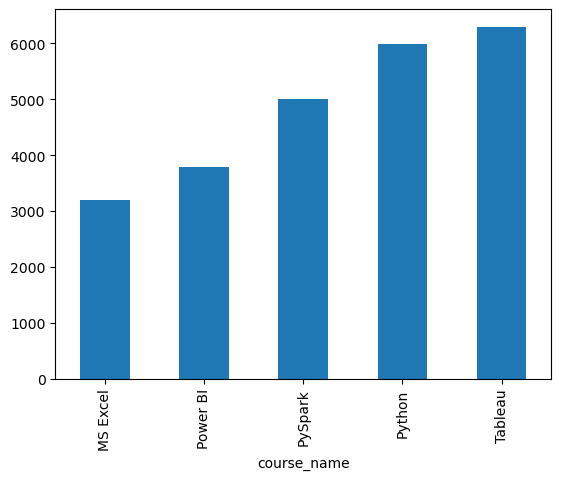

In [21]:

df = dff[["course_name" , "partner_name" , "price"]]
df = df.groupby("course_name")["price"].sum()

df.plot(kind="bar")


In [34]:

# 5 Student enrolled in nov and dec

common_id = np.intersect1d(nov["student_id"] , dec["student_id"])
students[students["student_id"].isin(common_id)]


,student_id,student_name
0,1,Aakash Mehta
1,2,Radha Dutt
5,6,Yasmin Palan


In [ ]:

# 6 Course That 0 enrolment 
# 7 Orange cap holder in each season
